# NLP with Disaster Tweets

Git repository: https://github.com/gabryallaseconda/DisasterTweetsNLP_Kaggle_CUBoulder

**Summary:**
The data preprocessing for the text classification project surpassed standard practices, incorporating an extensive process. Beyond normalization and data augmentation, the learner implemented spell correction to enhance the quality of the textual data. Additionally, missing data was filled through a meticulous procedure, ensuring a comprehensive dataset. Geographic entities handling was integrated into the preprocessing pipeline, showcasing a commitment to handling diverse text features. The plan of analysis, rooted in exploratory data analysis (EDA), was enriched with these advanced preprocessing steps, contributing to a more robust understanding of the data.

The chosen model architecture for text embedding was DistillBERT, recognized for its efficiency and effectiveness in distillation. DistillBERT was favored over other transformer models, such as GPT-3 and T5, due to its compact nature while maintaining competitive performance. In parallel, a pretrained model from TensorFlow Hub (model = "https://tfhub.dev/google/nnlm-en-dim50/2") was employed, offering a strong foundation for the project. The learner provided inventive details, specifying the number of layers in the model architecture and outlining metrics for selection, showcasing a nuanced approach to model design.

The learner addressed aspects that didn't work, providing valuable insights into potential limitations and challenges, including the complexities of preprocessing. Furthermore, forward-thinking suggestions for improvement were presented, highlighting the learner's strategic approach to refining the model or exploring alternative methodologies. Overall, the model had good performances.

In [1]:

import re, string, os

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt


/Users/gabrielegabrielli/Documents/NN/Kaggle_DisasterTweets/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing data

In [2]:
train = pd.read_csv('nlp-getting-started/train.csv')
test = pd.read_csv('nlp-getting-started/test.csv')


## EDA

In [3]:
train.sample(5)


,id,keyword,location,text,target
2380,3421,derail,Road to the Billionaires Club,@TheJenMorillo GM! I pray any attack of the en...,0
4300,6106,hellfire,Right next to Compton,@IAN_Hellfire I got it for the mistake but bos...,0
4689,6665,landslide,USA,Speaking of memorable debates: 60-Second Know-...,0
6161,8787,siren,NaN,I hate this damn Milwaukee IndyFest. All the c...,0
7315,10470,wild%20fires,NaN,@aria_ahrary @TheTawniest The out of control w...,1


In [4]:
train.shape

(7613, 5)

<Axes: >

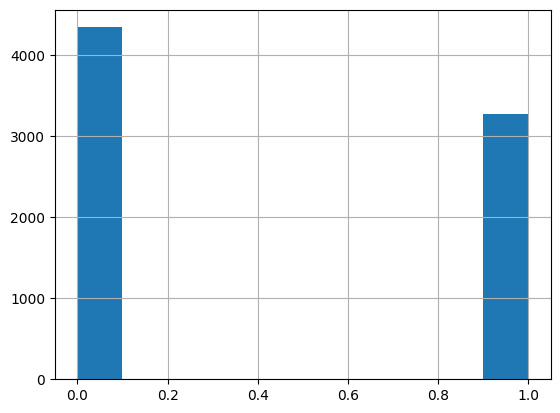

In [5]:
train.target.hist()

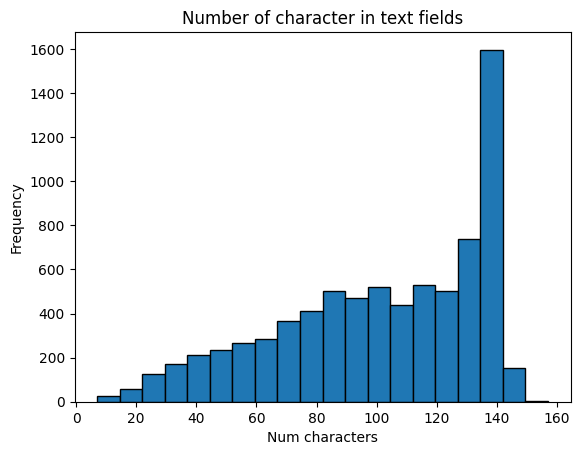

In [6]:
# Character in each row - histogram

# Aggiungi una nuova colonna che contiene il numero di caratteri in ogni testo
data = train['text'].apply(len)

# Plotta l'istogramma
plt.hist(data, bins=20, edgecolor='black')  # Puoi regolare il numero di bin secondo le tue esigenze
plt.title('Number of character in text fields')
plt.xlabel('Num characters')
plt.ylabel('Frequency')
plt.show()

## Prediction
Histogram of the predictions

<Axes: >

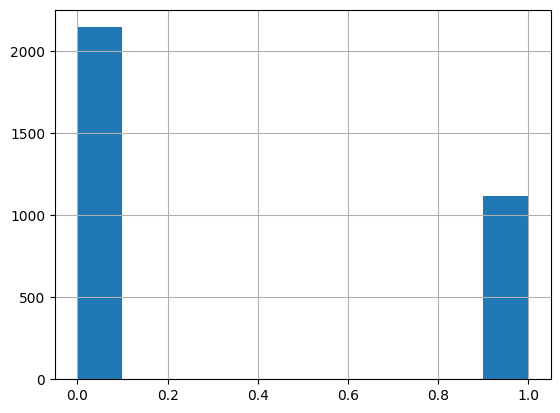

In [34]:
test.target.hist()